In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(context='talk', style='ticks',
        color_codes=True, rc={'legend.frameon': False})

from sqlalchemy import create_engine
from sqlalchemy import inspect
from sqlalchemy import MetaData

from rlmolecule.sql import Base, Session
from rlmolecule.sql.tables import GameStore, RewardStore, StateStore

%matplotlib inline

In [2]:
run_id = "gridworld_32"

dbname = "bde"
port = "5432"
host = "yuma.hpc.nrel.gov"
user = "rlops"
passwd_file = '/projects/rlmolecule/rlops_pass'
with open(passwd_file, 'r') as f:
    passwd = f.read().strip()
drivername = "postgresql+psycopg2"
engine_str = f'{drivername}://{user}:{passwd}@{host}:{port}/{dbname}'
        
engine = create_engine(engine_str, execution_options={"isolation_level": "AUTOCOMMIT"})

# load the games played
Session.configure(bind=engine)
session = Session()

In [3]:
df = pd.read_sql(session.query(GameStore).filter_by(run_id=run_id).statement, session.bind)

df['time_hours'] = (df.time - df.time.min()).apply(lambda x: x.total_seconds() / 3600)
df = df.sort_values('time_hours')
df_games = df
df_games.reset_index(drop=True, inplace=True)
df_games.head()

,id,run_id,time,raw_reward,scaled_reward,search_statistics,time_hours
0,cef299ca-a935-4f7d-8497-5cde2c544d13,gridworld_32,2021-04-24 14:59:56.714817,-0.876344,1.0,[[3d75d35ff6b29f444420770f31d3a3f89ca7f71bceae...,0.000000e+00
1,e78b78f1-88af-4027-8149-6e9e39153e46,gridworld_32,2021-04-24 14:59:56.714888,-0.876344,1.0,[[3d75d35ff6b29f444420770f31d3a3f89ca7f71bceae...,1.972222e-08
2,0dc26b24-a386-4b6b-bc66-e9dd0a421b9b,gridworld_32,2021-04-24 14:59:56.715319,-0.876344,1.0,[[3d75d35ff6b29f444420770f31d3a3f89ca7f71bceae...,1.394444e-07
3,62842770-784f-4d97-9965-67203f73debc,gridworld_32,2021-04-24 14:59:56.716119,-0.876344,1.0,[[3d75d35ff6b29f444420770f31d3a3f89ca7f71bceae...,3.616667e-07
4,49927b26-1b58-46d5-bf09-3c158136a1c0,gridworld_32,2021-04-24 14:59:56.716143,-0.876344,1.0,[[3d75d35ff6b29f444420770f31d3a3f89ca7f71bceae...,3.683333e-07


<AxesSubplot:>

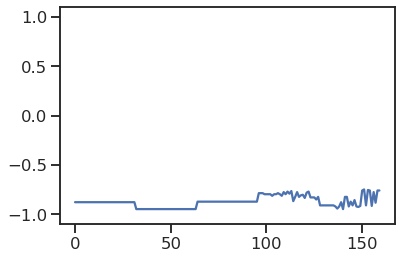

In [4]:
df["raw_reward"].plot(ylim=(-1.1, 1.1))

In [6]:
# engine =  create_engine('sqlite:///hallway_data.db',
#                          connect_args={'check_same_thread': False},
#                          execution_options = {"isolation_level": "AUTOCOMMIT"})

# dbname = "bde"
# port = "5432"
# host = "yuma.hpc.nrel.gov"
# user = "rlops"
# passwd_file = '/projects/rlmolecule/rlops_pass'
# with open(passwd_file, 'r') as f:
#     passwd = f.read().strip()
# drivername = "postgresql+psycopg2"
# engine_str = f'{drivername}://{user}:{passwd}@{host}:{port}/{dbname}'
        
# engine = create_engine(engine_str, execution_options={"isolation_level": "AUTOCOMMIT"})

In [16]:
float(df["time"].values[-1] - df["time"].values[0])/1e9/60

5.405813266666667

# 5x5 gridworld 

In [38]:
engine = create_engine(f'sqlite:///gridworld_data.db',
                       connect_args={'check_same_thread': False},
                       execution_options = {"isolation_level": "AUTOCOMMIT"})

In [47]:
_ = plot_reward(engine, -2)